In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#easy-чтение файла
df = pd.read_csv('titanic/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#easy-процент детей
df[df['Age'] < 18].shape[0] / df.shape[0]*100

12.682379349046016

In [6]:
#easy-соотношение мужчин/женщин
male_pr = df[df['Sex'] == "male"].shape[0] / df.shape[0]*100
fem_pr = df[df['Sex'] == "female"].shape[0] / df.shape[0]*100
mal_fem = df[df['Sex'] == "male"].shape[0] / df[df['Sex'] == "female"].shape[0]
print ('процент мужчин ',male_pr)
print ('процент женщин ', fem_pr)
print ('соотношение мужчин/женщин ', mal_fem)

процент мужчин  64.75869809203144
процент женщин  35.24130190796858
соотношение мужчин/женщин  1.8375796178343948


In [7]:
#normal-количество пассажиров, по которым нет данных о поле или возрасте
df_n=df.fillna(0)
n_none=int(df[(df_n['Age']==0)].shape[0]+df[(df_n['Sex']==0)].shape[0])
print(n_none)

177


(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

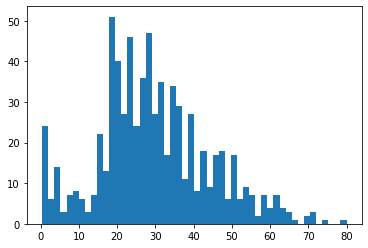

In [8]:
#normal - гистограмма по возрасту пассажиров
plt.hist(df['Age'], bins=50)

In [9]:
#normal - процент выживших мужчин, женщин и детей
male_surv = df[(df['Sex'] == "male")&(df['Survived'] == 1)].shape[0] / df[df['Sex'] == "male"].shape[0]*100
fem_surv = df[(df['Sex'] == "female")&(df['Survived'] == 1)].shape[0] / df[df['Sex'] == "female"].shape[0]*100
man_surv = df[(df['Age'] >= 18)&(df['Survived'] == 1)].shape[0] / df[df['Age'] >= 18].shape[0]*100
child_surv = df[(df['Age'] < 18)&(df['Survived'] == 1)].shape[0] / df[df['Age'] < 18].shape[0]*100
print ('процент выживших мужчин ',male_surv)
print ('процент выживших женщин ',fem_surv)
print ('процент выживших взрослых ',man_surv)
print ('процент выживших детей ',child_surv)

процент выживших мужчин  18.890814558058924
процент выживших женщин  74.20382165605095
процент выживших взрослых  38.10316139767055
процент выживших детей  53.98230088495575


In [10]:
#normal - расчёт корреляции между возрастом и выживаемостью, полом и выживаемостью
df1=df.copy()[['Survived','Age']]
df1.corr(method='pearson', min_periods=1)

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


In [11]:
#normal - расчёт корреляции между полом и выживаемостью
df2=df.copy()[['Survived','Sex']]
df2.corr(method='pearson', min_periods=1)

,Survived
Survived,1.0
